# **`AllLife Credit Card Customer Segmentation`**

### **`Background: `**
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### **`Objective: `**

To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.
Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?.


###  **`Data Description: `**
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

## **`Steps To Follow:`**


###  **`Deliverable – 1:`** 
Perform Univariate Analysis On The Data To Better Understand The Variables At Your Disposal And To Get An Idea About The No Of Clusters. Perform Eda, Create Visualizations To Explore Data. **(10 Marks)**

###  **`Deliverable – 2:`**
Properly Comment On The Codes, Provide Explanations Of The Steps Taken In The Notebook And Conclude Your Insights From The Graphs. **(5 Marks)**

###  **`Deliverable – 3:`** 
Execute K-Means Clustering Use Elbow Plot And Analyse Clusters Using Boxplot **(10 Marks)**

###  **`Deliverable – 4:`** 
Execute Hierarchical Clustering (With Different Linkages) With The Help Of Dendrogram And Cophenetic Coeff. Analyse Clusters Formed Using Boxplot **(15 Marks)**

###  **`Deliverable – 5:`** 
Calculate Average Silhouette Score For Both Methods. **(5 Marks)**

###  **`Deliverable – 6: `** 
Compare K-Means Clusters With Hierarchical Clusters. **(5 Marks)**

###  **`Deliverable – 7: `**
Analysis The Clusters Formed, Tell Us How Is One Cluster Different From Another And Answer All The Key Questions. **(10 Marks)**


# <a id = "link101"></a> `Index: `

- <a href = #link102>**Deliverable – 1 And Deliverable – 2** </a>
- <a href = #link104>**Deliverable – 3**</a>
- <a href = #link105>**Deliverable – 4**</a>
- <a href = #link106>**Deliverable – 5**</a>
- <a href = #link107>**Deliverable – 6**</a>
- <a href = #link108>**Deliverable – 7**</a>

# **`Deliverable – 1 And Deliverable – 2`** <a id = "link102"></a>

<a href = #link101> Back to Index </a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline 

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [4]:
#Read Data
pdata  = pd.read_excel('Credit Card Customer Data.xlsx')
pdata.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


### **`Observation:`** 
No nulls observed. There are some zeros in Total_visits_bank and Total_calls_made. Check further, how many zeros are present in each of these columns and also if they can be considered as missing values.

**Important Note:** 
1. *Customer Key* appears like an ID column, check its uniqueness. If all values are unique, then it will be considered as a categorical column and dropped from analysis and segmentation operations. 
2. *Sl_No* appears like record identifier. Check uniqueness and drop if necessary.
3. Avg_Credit_Limit may dominate further processing (e.g. averages),  therefore, scaling is required before further processing.

In [5]:
#Stastical Analysis
print(pdata.shape)

(660, 7)


*There are 660 rows and 7 columns in data.*

In [6]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
#Step4: Find number of unique values in each column. Analyse outcome for categorical variables.

pdata.nunique() # Number of unique values in a column

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

***Sl_No***: Number of rows in data and number of unique values in this column are same. It can be confirmed that *Sl_No* is the record identifier. Drop this column.

***Customer Key:*** Number of rows in data and number of unique values in this column are almost the same. This column appears like a broken key, and can be dropped. However, since there are 5 duplicate records in data, it is worth checking if there are exact duplicate rows. If there are, duplicate rows can be dropped.

In [8]:
pdata1 = pdata[pdata.duplicated(["Customer Key","Avg_Credit_Limit","Total_Credit_Cards",
                                 "Total_visits_bank","Total_visits_online","Total_calls_made"])]
pdata1

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


No duplicate rows found. Next, drop the columns required.

In [9]:
pdata.drop(["Customer Key","Sl_No"], axis=1,inplace=True)

In [10]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


In [11]:
#Step1: Find out how many nulls each column has:

print("Column Names and number of nulls they contains is as follows:")
print(pdata.isnull().sum()) # Number of nulls in each column of the dataframe
#pdata.isnull().values.any() # This is another way to check if there are any null values in data set

Column Names and number of nulls they contains is as follows:
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [12]:
#Step2: Find out how many zeros are present in data.

print(pdata[:][pdata[:] == 0].count()) # Number of zeros in a column

Avg_Credit_Limit         0
Total_Credit_Cards       0
Total_visits_bank      100
Total_visits_online    144
Total_calls_made        97
dtype: int64


In [13]:
#Step3: Find if any negative values are present in data:

print(pdata[:][pdata[:] < 0].count()) # Number of negatives in a column

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. There are 5 (Working) columns and 660 rows in the dataset.
2. All columns are integers.
3. Scaling is required.
4. No nulls and negative values observed.
5. Some zeros were observed in columns *Total_visits_bank*, *Total_visits_online*, and *Total_calls_made*. At this point, it might be worth checking with the business if this is possible. However, it seems that these values can contain a zero since these are methods of communication.
6. There are less number of unique values for ***Total_Credit_Cards***, ***Total_visits_bank***, ***Total_visits_online***, and ***Total_calls_made***. Perform frequency analysis for these.



In [14]:
#Step5: Part1 Frequency analysis for categorical variables. 
#Since age column has only 14 unique values it might be useful to do some frequency analysis

# value counts gives us how many times does the value 
print(pdata['Total_Credit_Cards'].value_counts(normalize=True))
print('')

4     0.228788
6     0.177273
7     0.153030
5     0.112121
2     0.096970
1     0.089394
3     0.080303
10    0.028788
9     0.016667
8     0.016667
Name: Total_Credit_Cards, dtype: float64



In [15]:
# value counts gives us how many times does the value 
print(pdata['Total_visits_bank'].value_counts(normalize=True))
print('')

2    0.239394
1    0.169697
3    0.151515
0    0.151515
5    0.148485
4    0.139394
Name: Total_visits_bank, dtype: float64



In [16]:
# value counts gives us how many times does the value 
print(pdata['Total_visits_online'].value_counts(normalize=True))
print('')

2     0.286364
0     0.218182
1     0.165152
4     0.104545
5     0.081818
3     0.066667
15    0.015152
7     0.010606
12    0.009091
10    0.009091
8     0.009091
13    0.007576
11    0.007576
9     0.006061
14    0.001515
6     0.001515
Name: Total_visits_online, dtype: float64



In [17]:
# value counts gives us how many times does the value 
print(pdata['Total_calls_made'].value_counts(normalize=True))
print('')

4     0.163636
0     0.146970
2     0.137879
1     0.136364
3     0.125758
6     0.059091
7     0.053030
9     0.048485
8     0.045455
5     0.043939
10    0.039394
Name: Total_calls_made, dtype: float64



### **`Observations: `** 

<a href = #link101> Back to Index </a>

1. Majority (50%+) customers possess between 4 and 7 cards, both inclusive. 
2. Around 70% customers have less than 3 Total_visits_bank.
3. Around 66% customers have less than 2 Total_visits_online. Seems there are outliers in this column.
4. Around 68% customers have less than 4 Total_calls_made.

### **`Approach:`** 

For next analysis and process, it is important to balance the effect of unit. Therefore, the data will be scaled.

In [18]:
#Scale data to balance the effect of unit.
pdataScaled=pdata.apply(zscore)
pdataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<AxesSubplot:xlabel='Total_calls_made'>

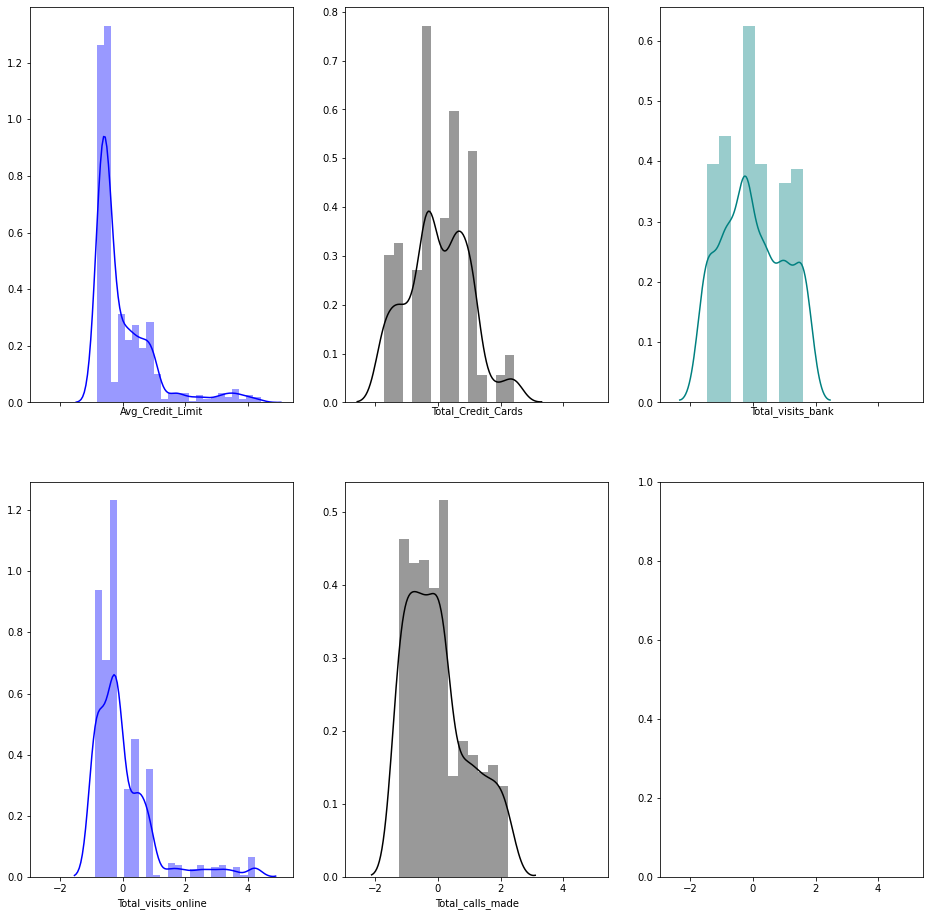

In [19]:
#Step6: Distribution Analysis
f, axes = plt.subplots(2, 3, figsize=(16, 16), sharex=True)
sns.distplot( pdataScaled["Avg_Credit_Limit"] , color="blue", ax=axes[0, 0])
sns.distplot( pdataScaled["Total_Credit_Cards"] , color="black", ax=axes[0, 1])
sns.distplot( pdataScaled["Total_visits_bank"] , color="teal", ax=axes[0, 2])

sns.distplot( pdataScaled["Total_visits_online"] , color="blue", ax=axes[1, 0])
sns.distplot( pdataScaled["Total_calls_made"] , color="black", ax=axes[1, 1])


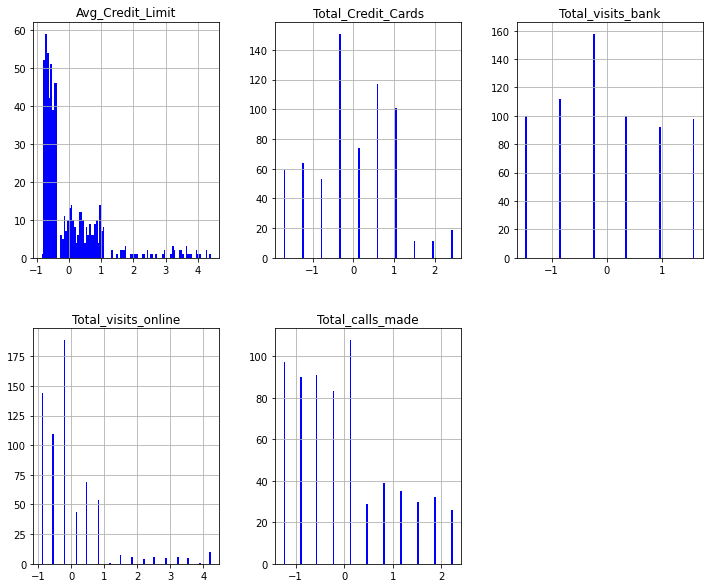

In [20]:
columns = list(pdataScaled)[:] 
pdataScaled[columns].hist(stacked=False, bins=100, figsize=(12,55), layout=(10,3), color='Blue'); 

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. None of the attributes show a symmetric distribution of data around median.
2. Columns Total_Credit_Cards,	Total_visits_bank, and	Total_calls_made seem fairly distributed, although there are multiple peaks.
3. **Distplots for Total_visits_online and Avg_Credit_Limit look similar**. They both are right skewed. There are upper outliers in these two columns
4. Outlier analysis will be performed for observation purpose only. Outliers will not be removed as this is a case of unsupervised learning. ***There is a good probability that the outliers form a separate cluster.***
5. The above histgram strengthen the observations for distplot analysis. It also strengthens our observations from frequency analysis above.

In [21]:
#Step6: Outlier Analysis: Method used: IQR

percentile_25 = {}
percentile_75 = {}
iqr = {}
lower_bound = {}
upper_bound = {}

for i in pdataScaled:
  percentile_25[i] = np.percentile(pdataScaled[i],25)
  percentile_75[i] = np.percentile(pdataScaled[i],75)
  iqr[i] = percentile_75[i] - percentile_25[i]
  lower_bound[i] = percentile_25[i] - (1.5 * iqr[i])
  upper_bound[i] = percentile_75[i] + (1.5 * iqr[i])
        
        
print(percentile_25)
print(percentile_75)
print(iqr)
print(lower_bound)
print(upper_bound)
print("\n")

{'Avg_Credit_Limit': -0.653622900114617, 'Total_Credit_Cards': -0.7875851517466029, 'Total_visits_bank': -0.860450628239986, 'Total_visits_online': -0.5474896948922904, 'Total_calls_made': -0.9022711257951177}
{'Avg_Credit_Limit': 0.3570967703258907, 'Total_Credit_Cards': 0.5973336763690932, 'Total_visits_bank': 0.9793898079535047, 'Total_visits_online': 0.4751797351895351, 'Total_calls_made': 0.4947938431779677}
{'Avg_Credit_Limit': 1.0107196704405077, 'Total_Credit_Cards': 1.384918828115696, 'Total_visits_bank': 1.8398404361934908, 'Total_visits_online': 1.0226694300818255, 'Total_calls_made': 1.3970649689730854}
{'Avg_Credit_Limit': -2.1697024057753787, 'Total_Credit_Cards': -2.864963393920147, 'Total_visits_bank': -3.620211282530222, 'Total_visits_online': -2.0814938400150287, 'Total_calls_made': -2.997868579254746}
{'Avg_Credit_Limit': 1.8731762759866524, 'Total_Credit_Cards': 2.6747119185426373, 'Total_visits_bank': 3.739150462243741, 'Total_visits_online': 2.0091838803122735, 'T

In [22]:
#Check how many outliers are present in each column
for i in pdataScaled:
    print("Count of lower bound outliers for column "+ i + ": " + str(pdataScaled[i][pdataScaled[i] < lower_bound[i]].count()))
    print("Count of upper bound outliers for column "+ i + ": " + str(pdataScaled[i][pdataScaled[i] > upper_bound[i]].count()))

Count of lower bound outliers for column Avg_Credit_Limit: 0
Count of upper bound outliers for column Avg_Credit_Limit: 39
Count of lower bound outliers for column Total_Credit_Cards: 0
Count of upper bound outliers for column Total_Credit_Cards: 0
Count of lower bound outliers for column Total_visits_bank: 0
Count of upper bound outliers for column Total_visits_bank: 0
Count of lower bound outliers for column Total_visits_online: 0
Count of upper bound outliers for column Total_visits_online: 37
Count of lower bound outliers for column Total_calls_made: 0
Count of upper bound outliers for column Total_calls_made: 0


Upper bound outliers for Avg_Credit_Limit and Total_visits_online. Number of outliers are almost the same. It was also observed previously that these two columns have similar looking distplots. It might be worth checking if these two have a strong correlation.

<AxesSubplot:xlabel='Total_calls_made'>

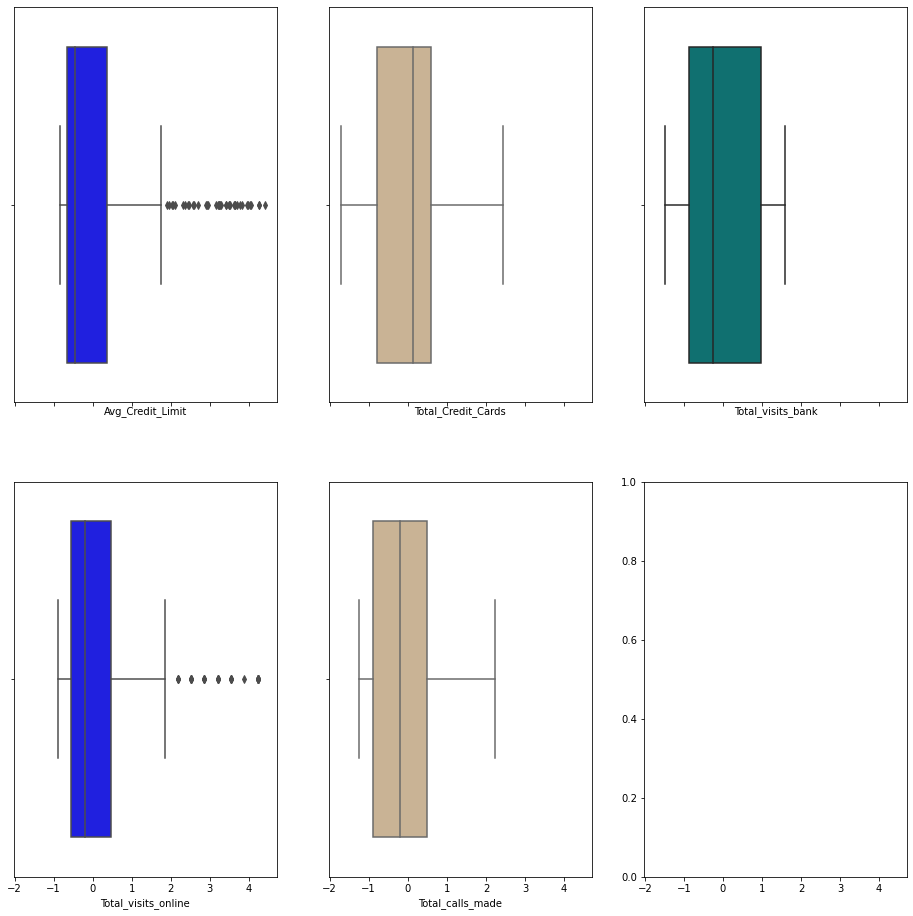

In [23]:
#Step7: BoxPlot Analysis

f, axes = plt.subplots(2, 3, figsize=(16, 16), sharex=True)
sns.boxplot( pdataScaled["Avg_Credit_Limit"] , color="blue", ax=axes[0, 0])
sns.boxplot( pdataScaled["Total_Credit_Cards"] , color="tan", ax=axes[0, 1])
sns.boxplot( pdataScaled["Total_visits_bank"] , color="teal", ax=axes[0, 2])

sns.boxplot( pdataScaled["Total_visits_online"] , color="blue", ax=axes[1, 0])
sns.boxplot( pdataScaled["Total_calls_made"] , color="tan",  ax=axes[1, 1])


### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. The above boxplots strengthen the observations for distplot analysis and outliers analysis.



# <a id = "link103"></a> **`Deliverable – 2: Bi-Variate Analysis:`**

<a href = #link101> Back to Index </a>

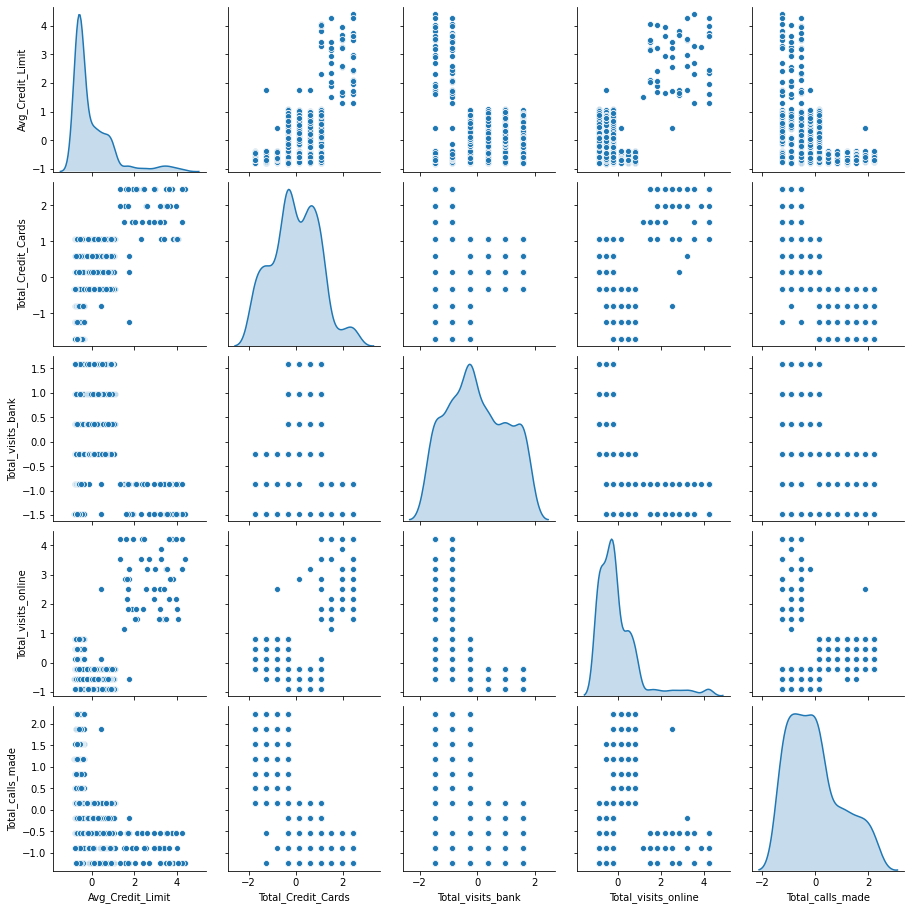

In [24]:
#Step1: Pairplot analysis

sns.pairplot(pdataScaled,diag_kind='kde')

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. **Important Observation**: **Some clear clusters can be observed in some pairs of data**. E.g. For the Plot Avg_Credit_Limit on X-axis and Total_Visits_Online on Y-axis, it can be observed that there are two clusters. One cluster is comprised of those cases where both Total_Visits_Online and Avg_Credit_Limit are high. Second cluster is the opposite, where both are low. There is a clear void space between these two clusters.
2. Similarly, there are **3 clusters** for pair "Total_Credit_Cards" and "Total_Calls_Made". There are 3 clusters for pair "Total_Calls_Made" and "Total_Visits_Online" etc.
3. Diagonals provide histograms that were already analysed.
4. Some conditional correlations can be seen like Avg_Credit_Limit tends to be higher for the cases where number of Total_Credit_Cards is higher, or Total_visits_online is higher.
5. To analyse the correlation between different variables further, perform heatmap / correlation analysis.


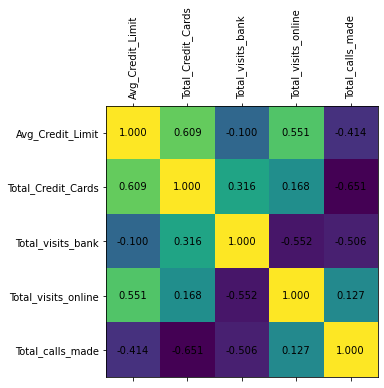

In [25]:
# Plotting correlation to analyze how different variables are correlated with each other
def plot_corr(df, size=5):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plot_corr(pdataScaled)

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. Avg_Credit_Limit seems to have strong +ve correlation with Total_Credit_Cards and Total_visits_online.
2. Total_Credit_Cards has strong negative correlation with Total_calls_made.
3. Total_Visits_bank has strong negative correlation with Total_visits_online and Total_calls_made. 

It can be inferred, though not concluded, from the given data that those customers who prefer a particular mode (e.g. _online_) of communication will not usually opt for other modes of communication.

In [26]:
#Correlation for main data in tabular format
pdata.corr().round(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000,0.609,-0.100,0.551,-0.414
Total_Credit_Cards,0.609,1.000,0.316,0.168,-0.651
Total_visits_bank,-0.100,0.316,1.000,-0.552,-0.506
Total_visits_online,0.551,0.168,-0.552,1.000,0.127
Total_calls_made,-0.414,-0.651,-0.506,0.127,1.000


In [27]:
#Correlation for scaled data in tabular format

pdataScaled.corr().round(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000,0.609,-0.100,0.551,-0.414
Total_Credit_Cards,0.609,1.000,0.316,0.168,-0.651
Total_visits_bank,-0.100,0.316,1.000,-0.552,-0.506
Total_visits_online,0.551,0.168,-0.552,1.000,0.127
Total_calls_made,-0.414,-0.651,-0.506,0.127,1.000


### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. Original data and scaled data have the exact same correlation. So it seems that the integrity of the data is not compromised after scaling.
2. Remaining observations were already provided while analysing the heatmap.

# **`Deliverable – 3:`** <a id = "link104"></a>

<a href = #link101> Back to Index </a>


## **`Approach:`** 

<a href = #link101> Back to Index </a>

1. Use K-Means clustering to form clusters of data. Use elbow method to determine the best value of K.
3. ***How to determine the best value of K:*** Following approach is used:
  
  a. Choose Two best values of K using the elbow method. 
  
  b. For those two values, calculate average silhouette_score.
  
  c. Plot silhouette_score plot for each value of __K__.

  d. __K__ with best silhoutte coefficient, and having least negative values for b(i) is chosen as the final.

For  2  clusters, the average silhoutte score is:  0.41842496663215445
For  3  clusters, the average silhoutte score is:  0.5157182558881063
For  4  clusters, the average silhoutte score is:  0.3556670619372605
For  5  clusters, the average silhoutte score is:  0.2717470361089752
For  6  clusters, the average silhoutte score is:  0.25545029453623114
For  7  clusters, the average silhoutte score is:  0.24864726376310903
For  8  clusters, the average silhoutte score is:  0.22729474473717595
For  9  clusters, the average silhoutte score is:  0.2187801244624267


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

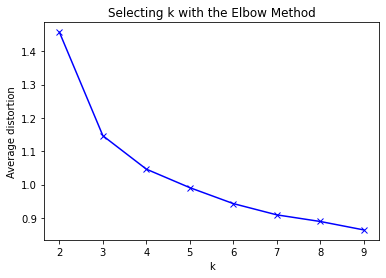

In [28]:
#Step1: Choose Two best values of K using the elbow method.
#Step2: Calculate average silhouette_score

clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(pdataScaled)
    prediction=model.predict(pdataScaled)
    silhoutte_avg = silhouette_score(pdataScaled,prediction)
    print("For ", k, " clusters, the average silhoutte score is: ", silhoutte_avg)
    meanDistortions.append(sum(np.min(cdist(pdataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / pdataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### **`Observations:`** 

<a href = #link101> Back to Index </a>

***`K = 3 or 4 seems a good choice for K. For K = 3 (3 clusters), the best value for average silhoutte score is obtained as: 0.5157182558881063.`***

For n_clusters = 2 The average silhouette_score is : 0.41842496663215445
For n_clusters = 3 The average silhouette_score is : 0.5157182558881063
For n_clusters = 4 The average silhouette_score is : 0.3556670619372605


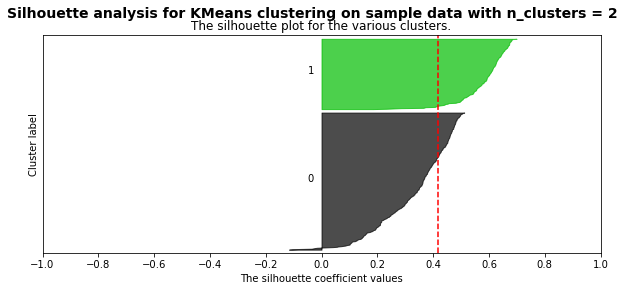

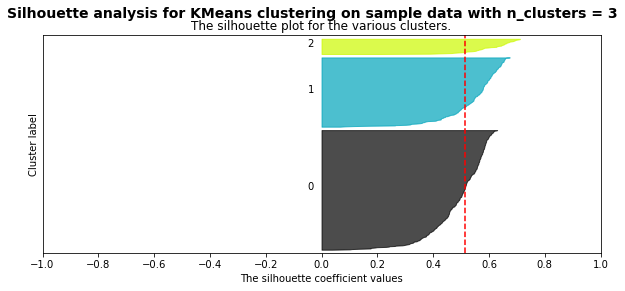

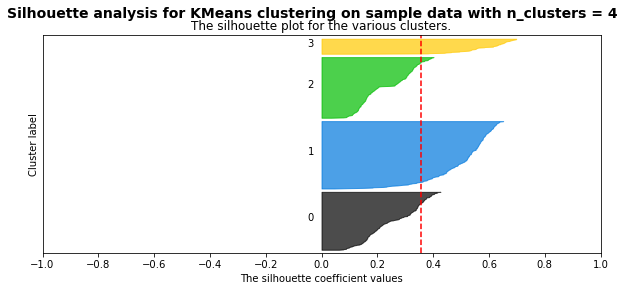

In [29]:
#Compute and Plot Silhoutte Score for different clusters

range_n_clusters=[2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1.
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pdataScaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pdataScaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pdataScaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pdataScaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. For k = 2, there are some negative values for b(i). The average silhouette_score is also lower than that for k = 3. Therere, it is not an ideal value.
2. For k = 3, there are **no** negative values for b(i). The average silhouette_score is the highest. Therere, it seems to be the ideal value.
3. For k = 4, there are **no** negative values for b(i). The average silhouette_score is the lowest amongst k = 2 or 3 or 4. Therere, it is not an ideal value.
4. ***Additional***: For k = 3 and k = 4, the plot for "cluster label" = 1 looks exactly the same. Also the plot for "cluster label" = 3 for k = 4 loos the same like the plot for "cluster label" = 2 for k = 3. Therefore, it can be inferred that when k shifted from 3 to 4, the "the plot for "cluster label" = 0 from k = 3 is splitted into the plot for "cluster label" = 0 and "cluster label" = 2 in case of k = 4.
5. ***Next Steps***: Check how well the data segments are explained for k = 3 vs k = 4.  Although, it is worth noting that k = 3 is stastically a better value for k compared to 4

In [30]:
#Let us first start with K = 3
final_model=KMeans(n_clusters = 3, random_state=10)
final_model.fit(pdataScaled)
prediction=final_model.predict(pdataScaled)

silhoutte_avg = silhouette_score(pdataScaled,prediction)
print(silhoutte_avg)

#Append the prediction 
pdata_K_3 = pdata.copy()
pdata_K_3["GROUP"] = prediction
pdata_K_3_scaled = pdataScaled.copy()
pdata_K_3_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
pdata_K_3.head()

0.5157182558881063
Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [31]:
techSuppClust = pdata_K_3.groupby(['GROUP'])
techSuppClust.count().T

GROUP,0,1,2
Avg_Credit_Limit,386,224,50
Total_Credit_Cards,386,224,50
Total_visits_bank,386,224,50
Total_visits_online,386,224,50
Total_calls_made,386,224,50


In [32]:
techSuppClust.describe().T

GROUP                                  0             1              2
Avg_Credit_Limit    count     386.000000    224.000000      50.000000
                    mean    33782.383420  12174.107143  141040.000000
                    std     22169.460696   5249.048524   34457.877272
                    min      5000.000000   3000.000000   84000.000000
                    25%     13000.000000   8000.000000  108750.000000
                    50%     31000.000000  12000.000000  145500.000000
                    75%     52000.000000  16000.000000  170000.000000
                    max    100000.000000  50000.000000  200000.000000
Total_Credit_Cards  count     386.000000    224.000000      50.000000
                    mean        5.515544      2.410714       8.740000
                    std         1.140069      1.100783       1.274715
                    min         2.000000      1.000000       5.000000
                    25%         4.000000      1.000000       8.000000
                    50%         6.000000      2.000000       9.000000
                    75%         6.000000      3.000000      10.000000
                    max         7.000000      4.000000      10.000000
Total_visits_bank   count     386.000000    224.000000      50.000000
                    mean        3.489637      0.933036       0.600000
                    std         1.135563      0.803567       0.494872
                    min         1.000000      0.000000       0.000000
                    25%         3.000000      0.000000       0.000000
                    50%         3.000000      1.000000       1.000000
                    75%         5.000000      2.000000       1.000000
                    max         5.000000      2.000000       1.000000
Total_visits_online count     386.000000    224.000000      50.000000
                    mean        0.981865      3.553571      10.900000
                    std         0.857167      1.218978       2.880264
                    min         0.000000      1.000000       6.000000
                    25%         0.000000      2.000000       8.000000
                    50%         1.000000      4.000000      11.000000
                    75%         2.000000      4.000000      13.000000
                    max         3.000000     10.000000      15.000000
Total_calls_made    count     386.000000    224.000000      50.000000
                    mean        2.000000      6.870536       1.080000
                    std         1.430648      1.990161       0.876915
                    min         0.000000      1.000000       0.000000
                    25%         1.000000      5.000000       0.000000
                    50%         2.000000      7.000000       1.000000
                    75%         3.000000      9.000000       2.000000
                    max         4.000000     10.000000       3.000000

array([<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
      dtype=object)

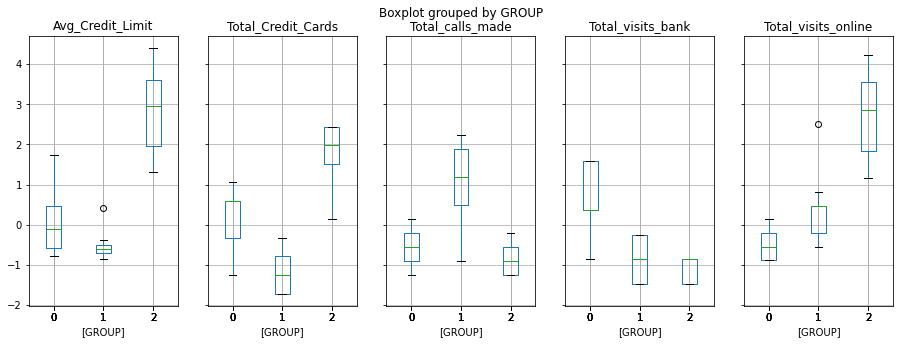

In [33]:
pdata_K_3_scaled.boxplot(by='GROUP', layout = (1,5),figsize=(15,5))

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. There are three clusters that are well segmented, and seem fairly isolated from each other. These three clusters are:

  a. Cluster 1: 224 customers are segmented in this cluster. These customers have lowest Avg_Credit_Limit and Total_Credit_Cards. They are middle when it comes to Total_visits_bank and Total_visits_online. But they have highest values for Total_calls_made amongst the three clusters. Overall, for this cluster, preferred mode of communication is: calls > bank visit > online

  b.  Cluster 0: More than 50% (386) customers are segmented in this cluster. These customers have higher values for Avg_Credit_Limit and Total_Credit_Cards than cluster 1 but lower values than cluster 2. They are middle when it comes to Total_calls_made. They have lowest value for Total_visits_online. But they have highest values for Total_visits_bank amongst the three clusters. Overall, for this cluster, preferred mode of communication is: bank visit > calls > online

  a. Cluster 2: 50 customers are segmented in this cluster. These customers have highest values for Avg_Credit_Limit, Total_visits_online, and Total_Credit_Cards. But they have lowest values for Total_visits_bank and Total_calls_made amongst the three clusters. Overall, for this cluster, preferred mode of communication is: online > calls > bank visit


2. Attribute wise, the the values in cluster can be given as:

  a. Avg_Credit_Limit: 2 > 0 > 1
  
  b. Total_Credit_Cards: 2 > 0 > 1
  
  c. Total_visits_bank:	0 > 1 > 2
  
  d. Total_visits_online: 2 > 1 > 0
  
  e. Total_calls_made: 1 > 0 > 2

In [34]:
# Let us now try with K = 4
final_model=KMeans(4)
final_model.fit(pdataScaled)
prediction=final_model.predict(pdataScaled)

silhoutte_avg = silhouette_score(pdataScaled,prediction)
print(silhoutte_avg)

#Append the prediction 
pdata_K_4 = pdata.copy()
pdata_K_4["GROUP"] = prediction
pdata_K_4_scaled = pdataScaled.copy()
pdata_K_4_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
pdata_K_4.head()

0.3556670619372605
Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,3
1,50000,3,0,10,9,1
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2


In [35]:
techSuppClust = pdata_K_4.groupby(['GROUP'])
#techSuppClust.describe().T
techSuppClust.mean().T

GROUP,0,1,2,3
Avg_Credit_Limit,31226.315789,12167.420814,141040.00,35904.522613
Total_Credit_Cards,5.478947,2.393665,8.74,5.522613
Total_visits_bank,4.515789,0.927602,0.60,2.477387
Total_visits_online,1.010526,3.574661,10.90,0.969849
Total_calls_made,1.936842,6.923077,1.08,2.075377


In [36]:
techSuppClust.describe().T

GROUP                                 0             1              2  \
Avg_Credit_Limit    count    190.000000    221.000000      50.000000   
                    mean   31226.315789  12167.420814  141040.000000   
                    std    21659.127922   5263.426740   34457.877272   
                    min     5000.000000   3000.000000   84000.000000   
                    25%    12000.000000   8000.000000  108750.000000   
                    50%    28000.000000  12000.000000  145500.000000   
                    75%    47000.000000  16000.000000  170000.000000   
                    max    75000.000000  50000.000000  200000.000000   
Total_Credit_Cards  count    190.000000    221.000000      50.000000   
                    mean       5.478947      2.393665       8.740000   
                    std        1.139516      1.097002       1.274715   
                    min        4.000000      1.000000       5.000000   
                    25%        4.000000      1.000000       8.000000   
                    50%        6.000000      2.000000       9.000000   
                    75%        6.000000      3.000000      10.000000   
                    max        7.000000      4.000000      10.000000   
Total_visits_bank   count    190.000000    221.000000      50.000000   
                    mean       4.515789      0.927602       0.600000   
                    std        0.501071      0.800118       0.494872   
                    min        4.000000      0.000000       0.000000   
                    25%        4.000000      0.000000       0.000000   
                    50%        5.000000      1.000000       1.000000   
                    75%        5.000000      2.000000       1.000000   
                    max        5.000000      2.000000       1.000000   
Total_visits_online count    190.000000    221.000000      50.000000   
                    mean       1.010526      3.574661      10.900000   
                    std        0.878849      1.209842       2.880264   
                    min        0.000000      1.000000       6.000000   
                    25%        0.000000      3.000000       8.000000   
                    50%        1.000000      4.000000      11.000000   
                    75%        2.000000      4.000000      13.000000   
                    max        2.000000     10.000000      15.000000   
Total_calls_made    count    190.000000    221.000000      50.000000   
                    mean       1.936842      6.923077       1.080000   
                    std        1.409045      1.944330       0.876915   
                    min        0.000000      2.000000       0.000000   
                    25%        1.000000      5.000000       0.000000   
                    50%        2.000000      7.000000       1.000000   
                    75%        3.000000      9.000000       2.000000   
                    max        4.000000     10.000000       3.000000   

GROUP                                  3  
Avg_Credit_Limit    count     199.000000  
                    mean    35904.522613  
                    std     22451.652425  
                    min      5000.000000  
                    25%     16000.000000  
                    50%     34000.000000  
                    75%     56000.000000  
                    max    100000.000000  
Total_Credit_Cards  count     199.000000  
                    mean        5.522613  
                    std         1.158300  
                    min         2.000000  
                    25%         4.000000  
                    50%         6.000000  
                    75%         6.500000  
                    max         7.000000  
Total_visits_bank   count     199.000000  
                    mean        2.477387  
                    std         0.557992  
                    min         0.000000  
                    25%         2.000000  
                    50%         3.000000  
                    75%         3.000000  
               

array([<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
      dtype=object)

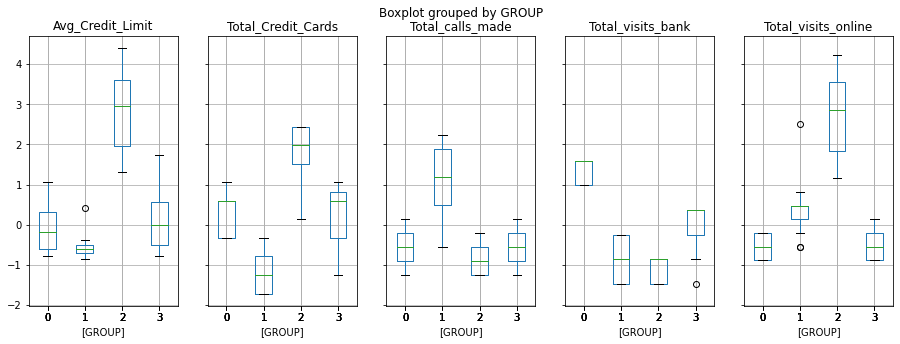

In [37]:
#techSuppClust = pdata_K_4.groupby(['GROUP'])
#techSuppClust.describe().T
pdata_K_4_scaled.boxplot(by='GROUP', layout = (1,5),figsize=(15,5))

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. ***Note***: For K = 4, the observations for silhouette_score have already been provided. The average silhouette_score for k = 4 is less than that for k = 3. Also, after observing the silhouette_score plot for k = 4 and k = 3, it was inferred that two of the 4 clusters in k = 4 are similar to those at k = 3. They even have almost same number of elements in them. Remaining two clusters of k = 4 are formed by splitting cluster 0 of k = 3.
2. Clusters 0 and 3 don't have much significant difference. Therefore, there might be some fuzzy overlap between them, which explains overall silhoutte score being low.
3. The difference between cluster 0 and 3 is not consistent also. E.g. min value for Total_Credit_Cards for cluster 0 is greater than that for cluster 3. But remaining values for Total_Credit_Cards for cluster 3 are greater than cluster 0.
4. Remaining observations on cluster patterns are similar to those of k = 3, and therefore, are not noted here to avoid redundant comments.

# **`Deliverable – 4`** <a id = "link105"></a>

<a href = #link101> Back to Index </a>

## **`Approach:`** 

<a href = #link101> Back to Index </a>

1. Use AgglomerativeClustering (hierarchical clustering) to form clusters of data.
2. ***How to determine the final model:*** Following approach is used:
  
  a. Use different AgglomerativeClustering models (try for different number of clusters and linkages). Calculate average silhouette_score for each of them. Choose best two models.
  
  b. For those two models silhouette_scores.
  
  c. Analyse Clusters Formed for The Chosen Models Using Boxplot. Choose the final model.

  d. Dendrogram And Cophenetic Coeff.

In [38]:
for k in clusters:
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit_predict(pdataScaled)
    y = model.labels_
    #prediction=model.predict(pdataScaled)
    silhoutte_avg = silhouette_score(pdataScaled, y)
    print("For ", k, " clusters, the average silhoutte score is: ", silhoutte_avg)


For  2  clusters, the average silhoutte score is:  0.5703183487340514
For  3  clusters, the average silhoutte score is:  0.515922432650965
For  4  clusters, the average silhoutte score is:  0.47495143595793504
For  5  clusters, the average silhoutte score is:  0.44039753024783956
For  6  clusters, the average silhoutte score is:  0.4153547954831452
For  7  clusters, the average silhoutte score is:  0.4183775674672025
For  8  clusters, the average silhoutte score is:  0.34306710358280806
For  9  clusters, the average silhoutte score is:  0.3415486932890892


In [39]:
import matplotlib.cm as cm

range_n_clusters= range(2,6)

for k in range_n_clusters:    
    print("Number of Clusters: ", k)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    for link_ in ["ward", "complete", "average", "single"]:
      clusterer = AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage= link_)
      cluster_labels = clusterer.fit_predict(pdataScaled)
      silhouette_avg = silhouette_score(pdataScaled, cluster_labels)
      print("For n_clusters =", k, " and linkage = " + link_ +
          " The average silhouette_score is :", silhouette_avg)

Number of Clusters:  2
For n_clusters = 2  and linkage = ward The average silhouette_score is : 0.417704147620949
For n_clusters = 2  and linkage = complete The average silhouette_score is : 0.5703183487340514
For n_clusters = 2  and linkage = average The average silhouette_score is : 0.5703183487340514
For n_clusters = 2  and linkage = single The average silhouette_score is : 0.2739862994346327
Number of Clusters:  3
For n_clusters = 3  and linkage = ward The average silhouette_score is : 0.5147639589977819
For n_clusters = 3  and linkage = complete The average silhouette_score is : 0.5026435522438492
For n_clusters = 3  and linkage = average The average silhouette_score is : 0.515922432650965
For n_clusters = 3  and linkage = single The average silhouette_score is : 0.3742893091424411
Number of Clusters:  4
For n_clusters = 4  and linkage = ward The average silhouette_score is : 0.3480822581261928
For n_clusters = 4  and linkage = complete The average silhouette_score is : 0.30527052

From Above Results, it can be observed that "n_clusters = 2" and "linkage = average or linkage = complete" show the best average silhouette_score of "0.5703183487340514".

Second best result is shown by 

For n_clusters = 2 The average silhouette_score is : 0.5703183487340514
For n_clusters = 3 The average silhouette_score is : 0.515922432650965
For n_clusters = 4 The average silhouette_score is : 0.47495143595793504


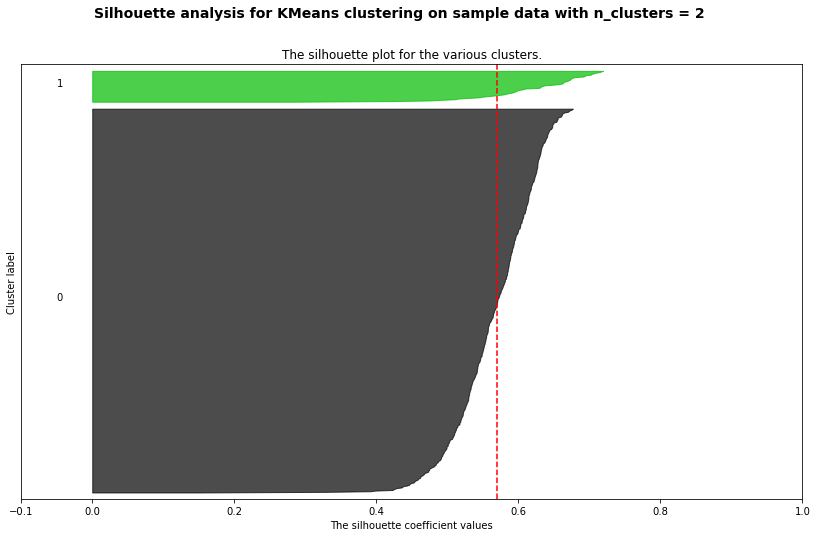

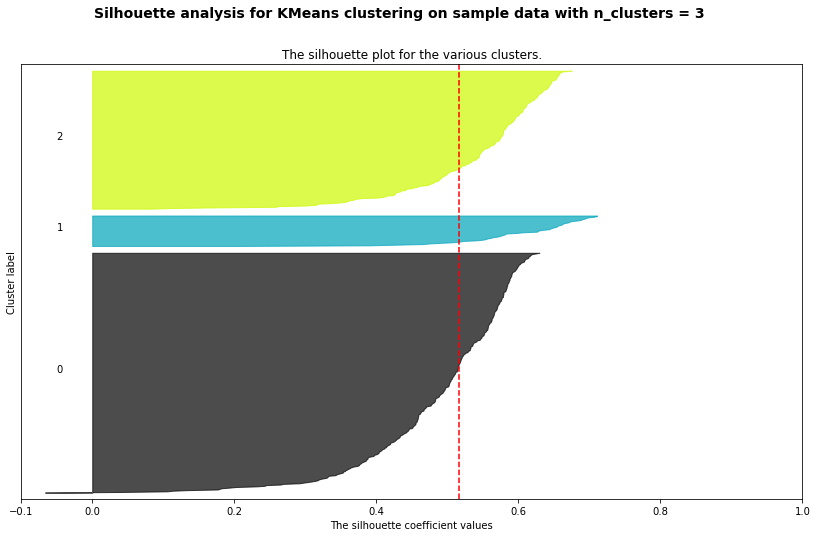

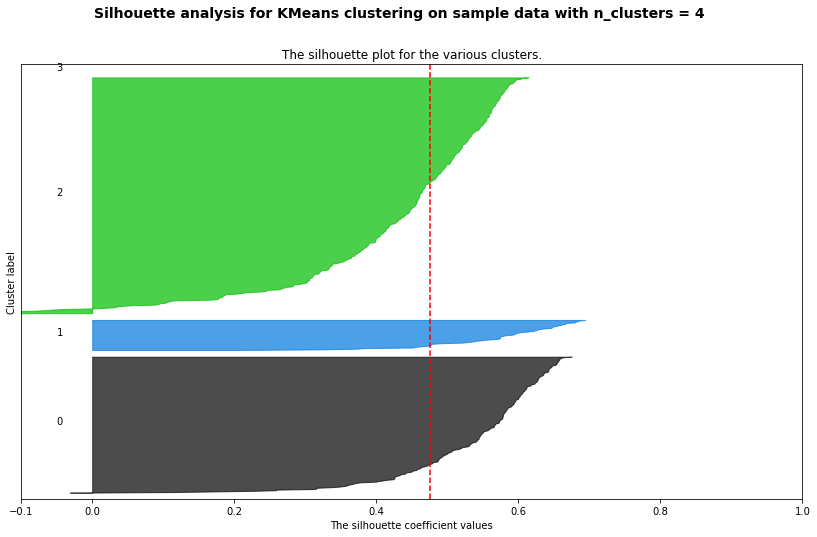

In [40]:
range_n_clusters=[2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(14, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pdataScaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',  linkage= "average")
    cluster_labels = clusterer.fit_predict(pdataScaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pdataScaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pdataScaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. __Comparison between n_clusters = 2 and n_clusters = 3__: 

  a. Average silhoutte score is more for n_clusters = 2 than n_clusters = 3
  
  b. Cluster / Label 1 looks exactly the same in both cases. 
  
  c. Cluster 0 is much bigger in size compared to Cluster 1 in case of n_clusters = 2. Therefore, it is worth breaking it down further. This breakdown is performed by n_clusters = 3.

  d. There are some slight negative cases for Cluster 0 in case of n_clusters = 3. However, it is less than -0.1. Therefore, it may be good to progress with this unless any contradictions.

2. __Comparison between n_clusters = 3 and n_clusters = 4__:

  a. No visible cases of Cluster 3 in case of n_clusters = 4 on plot. Therefore, it can be inferred that this cluster contains no or low number of records.

  b. Except for the fact that there is a 4th cluster with no or low number of records in case of n_clusters = 4, the remaining clusters look almost the same for both n_clusters = 3 and n_clusters = 4. The cluster labels might be different.

  c. Average silhoutte score is more for n_clusters = 3 than n_clusters = 4.

__Conclusion:__

Although n_clusters = 2 has the highest Average silhoutte score amongst n_clusters = [2, 3, 4], it doesn't fully explain the data. Therefore, based on the comparisons above, n_clusters = 3 seems the best value. Additional in-depth comparison will be performed to support this conclusion.


In [41]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

for i in ["average", "single", "complete", "weighted", "centroid", "median", "ward"]:
  Z = linkage(pdataScaled, metric='euclidean', method=i)
  c, coph_dists = cophenet(Z , pdist(pdataScaled))
  print("Method:", i, ", cophenet: ", c)

Method: average , cophenet:  0.8977080867389372
Method: single , cophenet:  0.7391220243806552
Method: complete , cophenet:  0.8599730607972423
Method: weighted , cophenet:  0.8861746814895477
Method: centroid , cophenet:  0.8939385846326323
Method: median , cophenet:  0.8893799537016724
Method: ward , cophenet:  0.7415156284827493


### **`Observations:`** 

<a href = #link101> Back to Index </a>

For method = average, coefficient score is: 0.8977080867389372. While creating model also, linkage method used is the same, i.e. average. This indicates that there is a very high correlation between dendogram distance and euclidean distance. It means that our dendogram is performing well to explain the overall data.

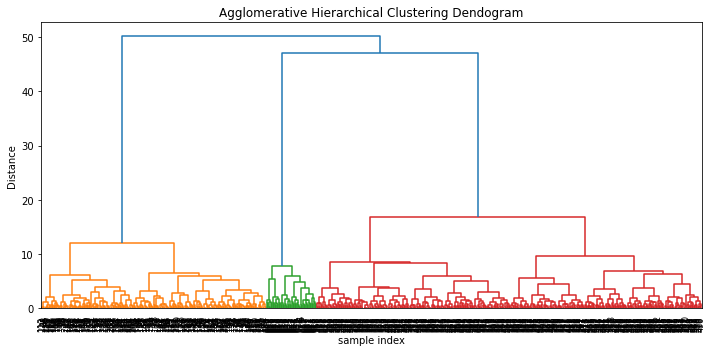

In [42]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [43]:
#First start with 3 "merged" clusters.
final_model=AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage= "average")
prediction = final_model.fit_predict(pdataScaled)

silhoutte_avg = silhouette_score(pdataScaled,prediction)
print(silhoutte_avg)

#Append the prediction 
pdata_A_3 = pdata.copy()
pdata_A_3["GROUP"] = prediction
pdata_A_3_scaled = pdataScaled.copy()
pdata_A_3_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
pdata_A_3.head()

0.515922432650965
Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


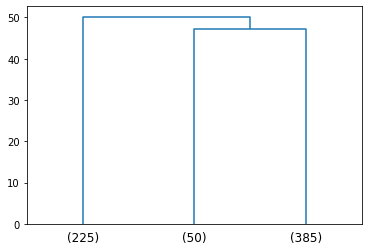

In [44]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(Z, truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [45]:
techSuppClust_A_3 = pdata_A_3.groupby(['GROUP'])
techSuppClust_A_3.describe().T

GROUP                                  0              1             2
Avg_Credit_Limit    count     387.000000      50.000000    223.000000
                    mean    33713.178295  141040.000000  12197.309417
                    std     22182.542428   34457.877272   5249.332169
                    min      5000.000000   84000.000000   3000.000000
                    25%     13000.000000  108750.000000   8000.000000
                    50%     31000.000000  145500.000000  12000.000000
                    75%     52000.000000  170000.000000  16000.000000
                    max    100000.000000  200000.000000  50000.000000
Total_Credit_Cards  count     387.000000      50.000000    223.000000
                    mean        5.511628       8.740000      2.403587
                    std         1.141195       1.274715      1.098068
                    min         2.000000       5.000000      1.000000
                    25%         4.000000       8.000000      1.000000
                    50%         6.000000       9.000000      2.000000
                    75%         6.000000      10.000000      3.000000
                    max         7.000000      10.000000      4.000000
Total_visits_bank   count     387.000000      50.000000    223.000000
                    mean        3.485788       0.600000      0.928251
                    std         1.136616       0.494872      0.802171
                    min         1.000000       0.000000      0.000000
                    25%         2.500000       0.000000      0.000000
                    50%         3.000000       1.000000      1.000000
                    75%         5.000000       1.000000      2.000000
                    max         5.000000       1.000000      2.000000
Total_visits_online count     387.000000      50.000000    223.000000
                    mean        0.984496      10.900000      3.560538
                    std         0.857619       2.880264      1.217242
                    min         0.000000       6.000000      1.000000
                    25%         0.000000       8.000000      2.500000
                    50%         1.000000      11.000000      4.000000
                    75%         2.000000      13.000000      4.000000
                    max         3.000000      15.000000     10.000000
Total_calls_made    count     387.000000      50.000000    223.000000
                    mean        2.005168       1.080000      6.883408
                    std         1.432406       0.876915      1.985271
                    min         0.000000       0.000000      1.000000
                    25%         1.000000       0.000000      5.000000
                    50%         2.000000       1.000000      7.000000
                    75%         3.000000       2.000000      9.000000
                    max         4.000000       3.000000     10.000000

array([<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
      dtype=object)

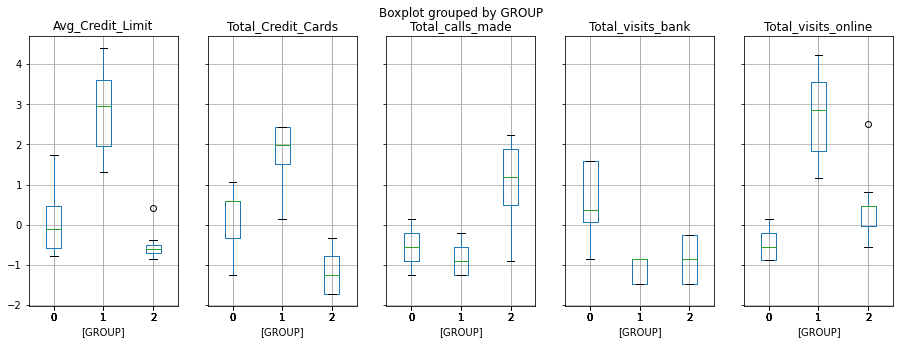

In [46]:
pdata_A_3_scaled.boxplot(by='GROUP', layout = (1,5),figsize=(15,5))

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. There are three clusters that are well segmented, and seem fairly isolated from each other. These three clusters are:

  **`a. Cluster 2`**: 223 customers are segmented in this cluster. These customers have lowest Avg_Credit_Limit and Total_Credit_Cards. They are middle when it comes to Total_visits_bank and Total_visits_online. But they have highest values for Total_calls_made amongst the three clusters. Overall, for this cluster, preferred mode of communication is: calls > bank visit > online. ***Comparing with K-Means clustering with same number of clusters (3), this cluster contains 1 record less.***

  **`b.  Cluster 0`**: More than 50% (387) customers are segmented in this cluster. These customers have higher values for Avg_Credit_Limit and Total_Credit_Cards than cluster 2 but lower values than cluster 1. They are middle when it comes to Total_calls_made. They have lowest value for Total_visits_online. But they have highest values for Total_visits_bank amongst the three clusters. Overall, for this cluster, preferred mode of communication is: bank visit > calls > online. ***Comparing with K-Means clustering with same number of clusters (3), this cluster contains 1 record more.***

  **`c. Cluster 1`**: 50 customers are segmented in this cluster. These customers have highest values for Avg_Credit_Limit, Total_visits_online, and Total_Credit_Cards. But they have lowest values for Total_visits_bank and Total_calls_made amongst the three clusters. Overall, for this cluster, preferred mode of communication is: online > calls > bank visit. ***Comparing with K-Means clustering with same number of clusters (3), this cluster contains same number of records***

2. Attribute wise, the the values in cluster can be given as:

  a. Avg_Credit_Limit: 2 > 0 > 1
  
  b. Total_Credit_Cards: 2 > 0 > 1
  
  c. Total_visits_bank:	1 > 2 > 0
  
  d. Total_visits_online: 0 > 2 > 1
  
  e. Total_calls_made: 1 > 0 > 2

In [47]:
#Try for 4 clusters.
final_model=AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage= "average")
prediction = final_model.fit_predict(pdataScaled)

silhoutte_avg = silhouette_score(pdataScaled,prediction)
print(silhoutte_avg)

#Append the prediction 
pdata_A_4 = pdata.copy()
pdata_A_4["GROUP"] = prediction
pdata_A_4_scaled = pdataScaled.copy()
pdata_A_4_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
pdata_A_4.head()

0.47495143595793504
Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,3
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1


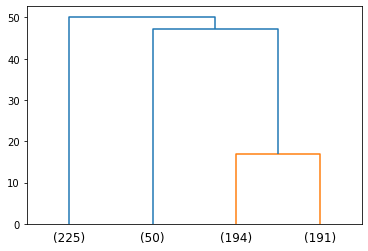

In [48]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(Z, truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

In [49]:
techSuppClust_A_4 = pdata_A_4.groupby(['GROUP'])
techSuppClust_A_4.describe().T

GROUP                                 0              1             2         3
Avg_Credit_Limit    count    223.000000      50.000000    386.000000       1.0
                    mean   12197.309417  141040.000000  33541.450777  100000.0
                    std     5249.332169   34457.877272  21952.240769       NaN
                    min     3000.000000   84000.000000   5000.000000  100000.0
                    25%     8000.000000  108750.000000  13000.000000  100000.0
                    50%    12000.000000  145500.000000  31000.000000  100000.0
                    75%    16000.000000  170000.000000  51750.000000  100000.0
                    max    50000.000000  200000.000000  75000.000000  100000.0
Total_Credit_Cards  count    223.000000      50.000000    386.000000       1.0
                    mean       2.403587       8.740000      5.520725       2.0
                    std        1.098068       1.274715      1.128537       NaN
                    min        1.000000       5.000000      4.000000       2.0
                    25%        1.000000       8.000000      4.000000       2.0
                    50%        2.000000       9.000000      6.000000       2.0
                    75%        3.000000      10.000000      6.000000       2.0
                    max        4.000000      10.000000      7.000000       2.0
Total_visits_bank   count    223.000000      50.000000    386.000000       1.0
                    mean       0.928251       0.600000      3.492228       1.0
                    std        0.802171       0.494872      1.131000       NaN
                    min        0.000000       0.000000      1.000000       1.0
                    25%        0.000000       0.000000      3.000000       1.0
                    50%        1.000000       1.000000      3.000000       1.0
                    75%        2.000000       1.000000      5.000000       1.0
                    max        2.000000       1.000000      5.000000       1.0
Total_visits_online count    223.000000      50.000000    386.000000       1.0
                    mean       3.560538      10.900000      0.984456       1.0
                    std        1.217242       2.880264      0.858732       NaN
                    min        1.000000       6.000000      0.000000       1.0
                    25%        2.500000       8.000000      0.000000       1.0
                    50%        4.000000      11.000000      1.000000       1.0
                    75%        4.000000      13.000000      2.000000       1.0
                    max       10.000000      15.000000      3.000000       1.0
Total_calls_made    count    223.000000      50.000000    386.000000       1.0
                    mean       6.883408       1.080000      2.010363       0.0
                    std        1.985271       0.876915      1.430610       NaN
                    min        1.000000       0.000000      0.000000       0.0
                    25%        5.000000       0.000000      1.000000       0.0
                    50%        7.000000       1.000000      2.000000       0.0
                    75%        9.000000       2.000000      3.000000       0.0
                    max       10.000000       3.000000      4.000000       0.0

array([<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
       <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
      dtype=object)

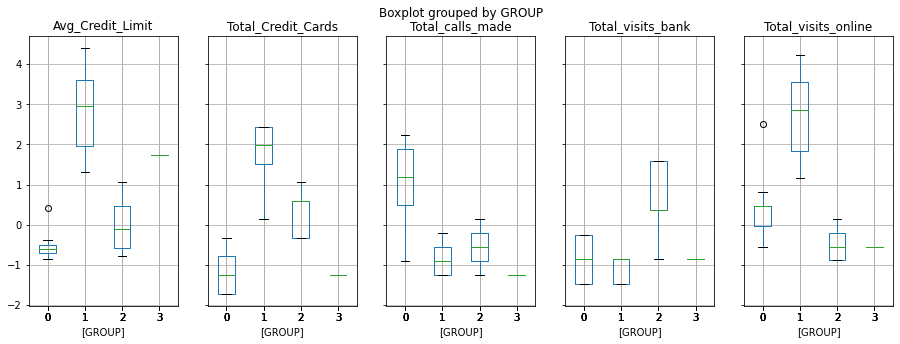

In [50]:
pdata_A_4_scaled.boxplot(by='GROUP', layout = (1,5),figsize=(15,5))

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. ***Note***: For 4 clusters, the observations for silhouette_score have already been provided. The average silhouette_score for k = 4 is less slightly than that for k = 3.
2. There is only 1 record in the 4th cluster or [GROUP] = 3.
3. It appears that the row in [GROUP] = 3 in this case is the outlier record from the largest group (having 387 elements) when cluster analysis was performed for n_clusters = 3.
4. Since there is only 1 record in 4th cluster, this explains why silhoutte plot didn't show anything when cluster analysis was performed previously.
5. Since there is only 1 record in 4th cluster, this explains why there is a slight decrease of average silhoutte score for n_clusters = 4 as compared with n_clusters = 3.
4. From this analysis, for hierarchical clustering, model with n_clusters = 3 seems the best, since there are no records in the 4th cluster.

# **`Deliverable – 5`** <a id = "link106"></a>

<a href = #link101> Back to Index </a>

## **Calculate Average Silhouette Score For Both Methods:**

### **Answer**:
1. Average Silhouette Score were calculated and plotted from point to point during model evaluation and selection. Corresponding comments were already provided.
2. For final model selected for K-Means (K = 3), the Average Silhouette Score = 0.5157182558881063. For final model selected for Agglomerative Clustering (n_clusters = 3), the Average Silhouette Score = 0.515922432650965. It is worth noting that Number of clusters and Average Silhouette Score are almost the same although algorithms differ.


# **`Deliverable – 6`** <a id = "link107"></a>

<a href = #link101> Back to Index </a>

## **Compare K-Means Clusters With Hierarchical Clusters**

### **Answer**:

This analysis was already performed while analysing Hierarchical Clusters for n_clusters = 3. Some of the key observations are listed as follows:

1. For final model selected for K-Means (K = 3), the Average Silhouette Score = 0.5157182558881063. For final model selected for Agglomerative Clustering (n_clusters = 3), the Average Silhouette Score = 0.515922432650965. It is worth noting that Number of clusters and Average Silhouette Score are almost the same although algorithms differ.

2. The cluster counts for K-Means and Hierarchical Clusters are as follows:

  a. Cluster 0 (High Avg_Credit_Limit, Total_Credit_Cards): K-Means - 50, Hierarchical - 50

  b. Cluster 1 (Moderate Avg_Credit_Limit, Total_Credit_Cards): K-Means - 386, Hierarchical - 387

  b. Cluster 2 (Low Avg_Credit_Limit, Total_Credit_Cards): K-Means - 224, Hierarchical - 223

3. The counts and values for mean, median, upper and lower quartiles are almost the same for both K-Means and Hierarchical clustering for number of clusters = 3.

___Conclusion___: The clusters formed are fairly consistent irrespective of the algorithm used for this data and for number of clusters = 3.

# **`Deliverable – 7`** <a id = "link108"></a>

<a href = #link101> Back to Index </a>

## Analysis The Clusters Formed, Tell Us How Is One Cluster Different From Another And Answer All The Key Questions.

### **Answer**:

The technical details of clusters were analysed and explained in details from point to point during cluster analysis and model selection. In this answer, we'll analyse the clusters again from business / functional point of view. The analysis will be provided while answering the key questions.

## **Key Question 1: How many different segments of customers are there?**
## **Key Question 2: How are these segments different from each other?**

There are three segments of customers here. These segments are:

1. **Segment 1:** These customers have the lowest Average Credit Limit and Total Credit Cards. Their Total Calls Made are the highest amongst the three segments. Based on data, their preferred mode of communication with the bank is calls > bank visit > online.

2. **Segment 2:** These customers have moderate Average Credit Limit and Total Credit Cards (higher than Segment 1 but lower than Segment 3). Their Total Bank Visits are the highest amongst the three segments. Based on data, their preferred mode of communication with the bank is  bank visit > online > calls.

3. **Segment 3:** These customers have the highest Average Credit Limit and Total Credit Cards. Their Total Online Visits are the highest amongst the three segments. Based on data, their preferred mode of communication with the bank is  online > calls > bank visit.


**Following are Some inferences that can be drawn from these clusters / segments:**

1. Customers in **Segment 1**, whose preferred mode of communciation is by call, show less response towards credit card products. Therefore, the customers in this segment have low values for Avg_Credit_Limit and Total_Credit_Cards.

2.  Customers in **Segment 3**, who pay more online visits, have the highest values for Avg_Credit_Limit and Total_Credit_Cards. However, the number of customers in this cluster is small as compared to other two clusters.

3. **Segment 2** customer segment contains the largest number of customers.Customers in this segment, who pay more bank visits, have higher values values for Avg_Credit_Limit and Total_Credit_Cards than Segment 1 but lower values than Segment 3. This should be considered as normal, especially considering that the purpose for a customer to visit bank may be other than to use / know about credit card services.

## **Key Question 3: What are your recommendations to the bank on how to better market to and service these customers?**

Following are the recommendations based on each Segment. Some recommendations are technical while some are business level.

1. **Segment 1**: Call centres are not able to attract customers towards credit card products. The marketing and call centre teams need to focus on improving their services. This may include providing discounts / offers to customers who subscribe to credit card products on call, improving customer grievance or query process on call, reducing call wait times, competency building for support executives etc. 

  On technical side, it might also be worth to separate this data from main data stream and perform additional analysis on it, such as understanding the socio-economic condition of the customers, their demographic information, their education and work conditions etc. Also, process improvement perspective, a customer feedback mechanism can be put in place to understand the feedback of the customers and possible scopes for improvement. However, these solutions may involve some operational / financial overhead.


2. **Segment 2**: This segment is the largest in size, and based on the available data, is performing fair to attract and retain customers towards credit card products. However, there are some scopes of improvements like periodic promotions, customer awareness programs, over the counter discounts and coupons etc. 
  
  Also, considering that this segment largest in size, marketing team should consider this segment as a high opportunity segment. They can work significantly towards promotion of online products and services to the customers in this segment. This will help increase the number of customers preferring online services or online communications. 


3. **Segment 3**: This segment is the smallest in size although average credit limit and number of credit cards in this segment is the largest compared to other segments. Therefore, it might be worth analysing the factors that are causing less customers to visit online frequently. Bank may have to come up with some strategies to attract more customers to use online / digital banking solutions. 
  This can be achieved by waiving off / discounting charges on online transactions, online account maintenance, credit card bill payments etc. Also, bank may introduce customer awareness programs to give information on how to use these products / services and get more and more users comfortable to these services. These may include some initial overheads during promotion and user awareness phase, but is extremely cost effective in the long run. 
  From technical perspective, design and marketing team may invest in technical infrastructure, generating instant and interactive dashboards for users, making user interface more friendly etc.


**Generic Recommendation**: It has been observed that many customers have more than one credit card with the same bank. Each credit card internally refers to an account, and therefore, is an operational overhead. The maintenance and follow up on the account balances may prove to be a challenge both to the bank and to the customer. Therefore, bank may consider to limit the number of credit an individual can possess. Instead of having multiple credit cards, bank can provide an option to increase the current credit limit for a card, based on conditions like customers' spending habits, their account clearing frequency etc.
